In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
start_date = '2019-01-01'
end_date = '2023-12-31'
company_list = ['NVIDIA', 'Bank of America', 'META', 'Microsoft', 'Apple', 'Tesla']
ticker_list = ['NVDA', 'BAC', 'META', 'MSFT', 'AAPL', 'TSLA']
chosen_stocks_data = pd.DataFrame()

# Creating the dataset for the chosen stocks and adding company name as a column to the dataset.
for i in range(len(ticker_list)):
  new_data = yf.download(ticker_list[i], start=start_date, end=end_date)
  new_data.columns = [col[0] for col in new_data.columns]
  # print(new_data)
  new_data['Company'] = company_list[i]
  cols = ['Company'] + [col for col in new_data.columns if col != 'Company']
  new_data = new_data[cols]

  chosen_stocks_data = pd.concat([chosen_stocks_data, new_data])

chosen_stocks_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Company,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2019-01-02 00:00:00+00:00,NVIDIA,3.378323,3.405500,3.462000,3.251250,3.266000,508752000
2019-01-03 00:00:00+00:00,NVIDIA,3.174215,3.199750,3.379000,3.192250,3.344750,705552000
2019-01-04 00:00:00+00:00,NVIDIA,3.377579,3.404750,3.443250,3.242500,3.273500,585620000
2019-01-07 00:00:00+00:00,NVIDIA,3.556391,3.585000,3.622250,3.410750,3.462500,709160000
2019-01-08 00:00:00+00:00,NVIDIA,3.467853,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,Tesla,252.539993,252.539993,258.220001,251.369995,256.760010,93249800
2023-12-26 00:00:00+00:00,Tesla,256.609985,256.609985,257.970001,252.910004,254.490005,86892400
2023-12-27 00:00:00+00:00,Tesla,261.440002,261.440002,263.339996,257.519989,258.350006,106494400


In [ ]:
chosen_stocks_data.shape

(7548, 7)

In [ ]:
chosen_stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7548 entries, 2019-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    7548 non-null   object 
 1   Adj Close  7548 non-null   float64
 2   Close      7548 non-null   float64
 3   High       7548 non-null   float64
 4   Low        7548 non-null   float64
 5   Open       7548 non-null   float64
 6   Volume     7548 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 471.8+ KB


In [ ]:
print("Head of the dataset:\n", chosen_stocks_data.head())
print("\nTail of the dataset:\n", chosen_stocks_data.tail())

Head of the dataset:
                           Company  Adj Close    Close     High      Low  \
Date                                                                      
2019-01-02 00:00:00+00:00  NVIDIA   3.378323  3.40550  3.46200  3.25125   
2019-01-03 00:00:00+00:00  NVIDIA   3.174215  3.19975  3.37900  3.19225   
2019-01-04 00:00:00+00:00  NVIDIA   3.377579  3.40475  3.44325  3.24250   
2019-01-07 00:00:00+00:00  NVIDIA   3.556391  3.58500  3.62225  3.41075   
2019-01-08 00:00:00+00:00  NVIDIA   3.467853  3.49575  3.66950  3.42250   

                              Open     Volume  
Date                                           
2019-01-02 00:00:00+00:00  3.26600  508752000  
2019-01-03 00:00:00+00:00  3.34475  705552000  
2019-01-04 00:00:00+00:00  3.27350  585620000  
2019-01-07 00:00:00+00:00  3.46250  709160000  
2019-01-08 00:00:00+00:00  3.66725  786016000  

Tail of the dataset:
                           Company   Adj Close       Close        High  \
Date                

In [ ]:
chosen_stocks_data.isna().sum()

,0
Company,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
chosen_stocks_data.duplicated().sum()

0

In [ ]:
chosen_stocks_data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,7548.000000,7548.000000,7548.000000,7548.000000,7548.000000,7.548000e+03
mean,134.139996,136.070506,137.981178,134.043018,136.012502,1.340489e+08
std,107.608575,108.159675,109.663561,106.598264,108.155546,1.778077e+08
min,3.174215,3.199750,3.379000,3.192250,3.266000,5.467500e+06
25%,28.396597,30.023750,30.389999,29.629999,30.000000,2.989482e+07
50%,130.713806,134.414993,136.290001,132.769997,134.510002,6.141840e+07
75%,220.172504,221.840839,225.775002,217.895004,222.185001,1.389218e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,2.511528e+09


In [ ]:
# Creating separate dataframes for each stocks by their ticker

grouped = chosen_stocks_data.groupby("Company")
NVDA = grouped.get_group("NVIDIA")
BAC = grouped.get_group("Bank of America")
META = grouped.get_group("META")
MSFT = grouped.get_group("Microsoft")
AAPL = grouped.get_group("Apple")
TSLA = grouped.get_group("Tesla")


In [ ]:
NVDA.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,17.720085,17.746357,18.063217,17.398304,17.735224,4.626401e+08
std,12.469613,12.467577,12.671649,12.252519,12.475733,1.998933e+08
min,3.174215,3.199750,3.379000,3.192250,3.266000,9.788400e+07
25%,6.805026,6.832062,7.055063,6.702812,6.915000,3.246800e+08
50%,14.551694,14.582000,14.863125,14.230000,14.578500,4.319750e+08
75%,23.059925,23.092750,23.666750,22.543750,23.189499,5.645790e+08
max,50.393753,50.409000,50.548000,49.411999,50.216000,2.511528e+09


In [ ]:
BAC.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,30.117182,32.702496,33.083394,32.321264,32.703251,5.312474e+07
std,6.272600,6.518320,6.564714,6.488750,6.535888,2.312628e+07
min,16.157309,18.080000,19.670000,17.950001,19.260000,1.380540e+07
25%,25.411348,28.219999,28.522501,27.879999,28.167500,3.883972e+07
50%,29.245420,31.385000,31.715000,30.835000,31.285000,4.764715e+07
75%,34.246220,36.662498,37.130001,36.169998,36.745000,6.003378e+07
max,45.891743,49.380001,50.110001,49.029999,49.910000,2.184033e+08


In [ ]:
META.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,235.087957,235.795779,239.009889,232.499444,235.630445,2.344700e+07
std,69.199652,69.408004,69.979340,68.806882,69.450960,1.556191e+07
min,88.643105,88.910004,90.459999,88.089996,90.080002,5.467500e+06
25%,180.740814,181.285000,183.779999,178.912502,180.964996,1.483550e+07
50%,219.309677,219.969994,221.875000,216.705002,220.355003,1.958095e+07
75%,296.594460,297.487495,301.464996,293.014999,297.817497,2.745988e+07
max,381.032715,382.179993,384.329987,378.809998,381.679993,2.323166e+08


In [ ]:
MSFT.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,230.051198,236.259849,238.610978,233.662464,236.161208,2.943760e+07
std,72.912789,72.388476,73.008324,71.709782,72.390449,1.236255e+07
min,91.804253,97.400002,100.190002,97.199997,99.550003,8.989200e+06
25%,166.826710,174.132504,175.212498,170.842506,174.132500,2.163895e+07
50%,237.659508,243.014999,245.300003,240.830002,243.195000,2.642535e+07
75%,286.253716,293.379997,295.117500,289.507492,292.342514,3.342020e+07
max,379.859467,382.700012,384.299988,378.160004,383.760010,9.701270e+07


In [ ]:
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,120.976086,123.031085,124.320123,121.600564,122.905654,1.015904e+08
std,46.590089,46.527387,46.936453,46.091299,46.512681,5.261087e+07
min,33.952549,35.547501,36.430000,35.500000,35.994999,2.404830e+07
25%,75.023405,77.379377,77.998749,76.109377,76.863749,6.803012e+07
50%,132.011177,134.614998,136.000000,133.330002,134.794998,8.861740e+07
75%,157.441685,159.665001,162.119999,157.709999,159.730000,1.189786e+08
max,197.144165,198.110001,199.619995,197.000000,198.020004,4.265100e+08


In [ ]:
TSLA.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,170.887469,170.887469,174.799467,166.776068,170.939232,1.340533e+08
std,108.304521,108.304521,110.786142,105.821131,108.455419,8.545776e+07
min,11.931333,11.931333,12.445333,11.799333,12.073333,2.940180e+07
25%,49.886168,49.886168,51.554335,47.545667,49.244500,8.009820e+07
50%,200.313332,200.313332,204.571663,194.544998,200.045006,1.094693e+08
75%,251.844997,251.844997,256.570000,246.292503,251.392498,1.585209e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08


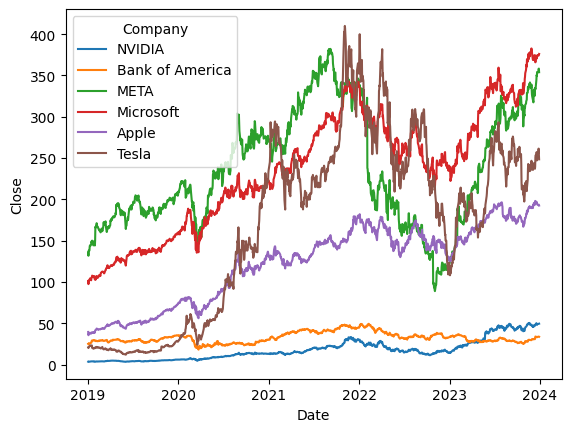

In [ ]:
sns.lineplot(data=chosen_stocks_data, x="Date", y="Close", hue="Company");

In [ ]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    1258 non-null   object 
 1   Adj Close  1258 non-null   float64
 2   Close      1258 non-null   float64
 3   High       1258 non-null   float64
 4   Low        1258 non-null   float64
 5   Open       1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.6+ KB


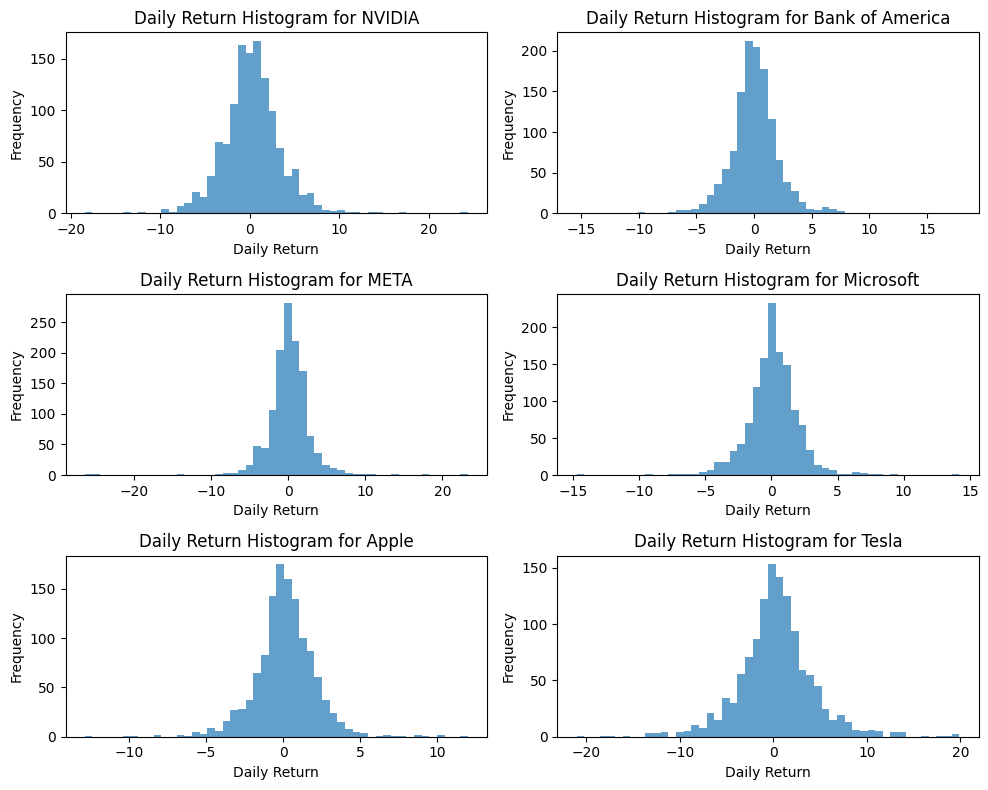

In [ ]:
# Plotting separate histograms for daily closing values of stocks

dataframes =[NVDA, BAC, META, MSFT, AAPL, TSLA]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, (company, df) in enumerate(zip(company_list, dataframes)):
    # df['daily_return'] = df['Close'].pct_change() * 100
    # To avoid warnings in the output, copying the dataframes.
    # df = df.copy()
    df = df.assign(Daily_Return = df['Close'].pct_change() * 100)
    # df.loc[:, 'Daily Return'] = df['Close'].pct_change() * 100

    axes[i].hist(df['Daily_Return'].dropna(), bins=50, alpha=0.7)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Daily Return')
    axes[i].set_title(f'Daily Return Histogram for {company}')

plt.tight_layout()
plt.show()


In [ ]:

# https://plotly.com/python/subplots/
# https://medium.com/@lucasjamar47/advanced-tips-for-candlestick-plots-in-python-66977793bee

fig = make_subplots(rows=3, cols=2, subplot_titles=company_list)

for i, (company, df) in enumerate(zip(company_list, dataframes)):
    row = (i // 2) + 1
    col = (i % 2) + 1

    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name=company
    ), row=row, col=col)

    fig.update_xaxes(rangeslider_visible=False, row=row, col=col)

fig.update_layout(
    title='Stock Prices for Chosen Companies (2019 - 2024)',
    height=1000,
    width=1200,
    showlegend=False
)

for i in range(1, 7):
    fig.update_yaxes(title_text="Stock Price ($)", row=(i-1)//2 + 1, col=(i-1)%2 + 1)

fig.show()


In [ ]:
# https://www.geeksforgeeks.org/greedy-best-first-search-in-ai/
# Pseudo-code of GBFS Algorithm from the class slides

# Implementing GBFS to find best stock with highest growth among the chosen stocks.
# f(n) = h(n)

import heapq

# The growth of the stock within years (as percentage) has been used as h(n)
def heuristic(historical_data):
    return (historical_data['Close'].iloc[-1] / historical_data['Close'].iloc[0]) - 1


# Defining GBFS to find the best stock with the highest growth among the chosen stocks.
def GBFS(df_of_stocks, heuristic_function):

    # Initializing the frontier as a priority queue -heap-
    frontier = []
    highest_stock = None
    # Since we are looking for a better growth, choosing a low value to start making comparison.
    highest_growth = -float('inf')

    for company, df in df_of_stocks.items():
        # Calculating the heuristic value for the stocks and putting them into the queue
        heuristic_value = heuristic_function(df)
        heapq.heappush(frontier, (heuristic_value, company, df))

    print("Historical data of the stock market from {} to {}".format(start_date, end_date))

    while frontier:
        # Selecting the stock from the queue to start comparison process.
        heuristic_value, company, df = heapq.heappop(frontier)

        # Printing the growth of the stock that is currently being evaluated
        print("{} has {:.2f}% growth.".format(company, heuristic_value*100))

        # Tracking the best stock with the highest growth
        if heuristic_value > highest_growth:
            highest_growth = heuristic_value
            highest_stock = company

    # Returning the best stock after all evaluations with the percentage convertion
    return highest_stock, highest_growth * 100

historical_data_of_stocks = {
    'NVIDIA': NVDA, 'Bank of America': BAC, 'META': META, 'Microsoft': MSFT, 'Apple': AAPL, 'Tesla': TSLA,
    }

highest_stock, df_of_best_stock = GBFS(historical_data_of_stocks, heuristic)
print(f"\nAccording to GBFS algorithm with the heuristic of growth on closing price, the best stock to buy is {highest_stock}.")

Historical data of the stock market from 2019-01-01 to 2023-12-31
Bank of America has 34.90% growth.
META has 160.88% growth.
Microsoft has 271.87% growth.
Apple has 387.66% growth.
Tesla has 1101.86% growth.
NVIDIA has 1354.18% growth.

According to GBFS algorithm with the heuristic of growth on closing price, the best stock to buy is NVIDIA.


In [ ]:
# Creating new dataset of the last 3 months of the historical data of the stocks.

expanded_company_list = ['NVIDIA', 'Bank of America', 'META', 'Microsoft', 'Apple', 'Tesla', 'Amazon', 'Palantir Tech.', 'Pfizer', 'Salesforce', 'Coca-Cola', 'Chipotle']
expanded_ticker_list = ['NVDA', 'BAC', 'META', 'MSFT', 'AAPL', 'TSLA', 'AMZN', 'PLTR', 'PFE', 'CRM', 'KO', 'CMG']
expanded_chosen_stocks_data = pd.DataFrame()

# Gathering two months of historical data for the expanded stock list.
new_end_date = datetime.today()
new_start_date = new_end_date - timedelta(days=90)

for i in range(len(expanded_ticker_list)):
  additional_new_data = yf.download(expanded_ticker_list[i], start=new_start_date, end=new_end_date)
  additional_new_data.columns = [col[0] for col in additional_new_data.columns]
  # print(new_data)
  additional_new_data['Company'] = expanded_company_list[i]
  cols = ['Company'] + [col for col in additional_new_data.columns if col != 'Company']
  additional_new_data = additional_new_data[cols]

  expanded_chosen_stocks_data = pd.concat([expanded_chosen_stocks_data, additional_new_data])

expanded_chosen_stocks_data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Company,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-08-26 00:00:00+00:00,NVIDIA,126.449181,126.459999,131.259995,124.370003,129.570007,331964700
2024-08-27 00:00:00+00:00,NVIDIA,128.289032,128.300003,129.199997,123.879997,125.050003,303134600
2024-08-28 00:00:00+00:00,NVIDIA,125.599258,125.610001,128.330002,122.639999,128.119995,448101100
2024-08-29 00:00:00+00:00,NVIDIA,117.579941,117.589996,124.430000,116.709999,121.360001,453023300
2024-08-30 00:00:00+00:00,NVIDIA,119.359795,119.370003,121.750000,117.220001,119.529999,333751600
...,...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,Chipotle,58.810001,58.810001,59.380001,58.459999,58.680000,5898500
2024-11-19 00:00:00+00:00,Chipotle,58.730000,58.730000,59.049999,57.669998,58.410000,9562500
2024-11-20 00:00:00+00:00,Chipotle,58.880001,58.880001,59.220001,58.189999,58.959999,6399900


In [ ]:
# Grouping the dataframes and assigning the value to the tickers.

additional_grouped = expanded_chosen_stocks_data.groupby("Company")
NVDA = additional_grouped.get_group("NVIDIA")
BAC = additional_grouped.get_group("Bank of America")
META = additional_grouped.get_group("META")
MSFT = additional_grouped.get_group("Microsoft")
AAPL = additional_grouped.get_group("Apple")
TSLA = additional_grouped.get_group("Tesla")
AMZN = additional_grouped.get_group("Amazon")
PLTR = additional_grouped.get_group("Palantir Tech.")
PFE = additional_grouped.get_group("Pfizer")
CRM = additional_grouped.get_group("Salesforce")
KO = additional_grouped.get_group("Coca-Cola")
CMG = additional_grouped.get_group("Chipotle")


In [ ]:
# https://www.quantifiedstrategies.com/how-to-calculate-the-sharpe-ratio-in-python/
# https://www.quantifiedstrategies.com/sharpe-ratio/
# https://www.geeksforgeeks.org/a-search-algorithm-in-python/
# # Pseudo-code of A* Algorithm from the class slides

# A* algorithm with the sharpe ratio as heuristic and standard deviation as cost.

# Instead of only taking the growth, a widely used technique in financial analysis
# sharpe ratio is being taken as heuristic since it is based on both adjusted return and the volatility.
# Sharpe Ratio is (average daily return on the stock – the risk-free rate) / standard deviation of the return

import heapq

# Our heuristic funtion -h(n)- is the sharpe ratio.
def heuristic(historical_data, risk_free_rate=0.05):

    # Daily Returns of the stocks
    historical_data = historical_data.assign(Daily_Return = historical_data['Close'].pct_change())
    # Average of the daily returns
    mean_daily_return = historical_data['Daily_Return'].mean()
    # # Standard deviation of the daily returns
    std_daily_return = historical_data['Daily_Return'].std()
    # Sharpe ratio calculation with the daily based risk rate
    sharpe_ratio = (mean_daily_return - risk_free_rate / 252) / std_daily_return
    # To make the ratio more general, we annualize Sharpe ratio based on 3 months
    # There are 252 trading days in a calendar year, so 63 days for 3 months.
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(63)

    # If sharpe ratio is smaller than zero, it would give the algorithm wrong idea.
    # So, we are taking its abstract value and penalize it by multiplyin with 5.
    if annualized_sharpe_ratio < 0:
        annualized_sharpe_ratio = abs(annualized_sharpe_ratio) * 5

    return annualized_sharpe_ratio

# Our cost function -g(n)- is the standard deviation of the closing prices of the stocks.
def cost(historical_data):
    return np.std(historical_data['Close'])

# Defining A* to find the best stock in the balance of adjusted return and volatility among the chosen stocks.
# f(n) = g(n) + h(n) in A*
def A_star(df_of_stocks, heuristic_function, cost_function):

    # Initializing the priority queue -heap-
    frontier = []
    optimal_stock = None
    # Since we are looking for minimum f(n) of the most optimal stock, we are choosing a high value to start making comparison.
    optimal_f_value = float('inf')

    for company, df in df_of_stocks.items():
        # Calculating the g(n), h(n) and f(n) of the stocks and putting them into the queue.
        cost_value = cost_function(df)
        heuristic_value = heuristic_function(df)
        f_value = cost_value + heuristic_value

        heapq.heappush(frontier, (f_value, company, cost_value, heuristic_value, df))

    while frontier:
        # Selecting the first stock from the queue to start comparison process.
        f_value, company, cost_value, heuristic_value, df = heapq.heappop(frontier)

        print("{} has {:.2f} standard deviation as cost function and {:.2f} sharpe ratio as heuristic which makes total f value {:.2f}.".format(company, cost_value, heuristic_value, f_value))

        # Tracking the optimal stock with the balanced adjusted return and risk.
        if f_value < optimal_f_value:
            optimal_f_value = f_value
            optimal_stock = company

    # Returning the most optimal stock among the chosen stocks
    return optimal_stock, optimal_f_value


In [ ]:
complete_historical_data_of_stocks = {
    'NVIDIA': NVDA, 'Bank of America': BAC, 'META': META, 'Microsoft': MSFT, 'Apple': AAPL, 'Tesla': TSLA, 'Amazon': AMZN, 'Palantir Tech.': PLTR, 'Pfizer': PFE, 'Salesforce': CRM, 'Coca-Cola': KO, 'Chipotle': CMG
    }

print("Historical data of the stock market from {} to {}:\n".format(new_start_date, new_end_date))

optimal_stock, optimal_f_value = A_star(complete_historical_data_of_stocks, heuristic, cost)
print(f"\nAccording to A* algorithm with the cost of standard deviation and the heuristic of sharpe ratio, the most optimal stock to buy is {optimal_stock}.")

Historical data of the stock market from 2024-08-26 18:02:22.357256 to 2024-11-24 18:02:22.357256:

Chipotle has 1.94 standard deviation as cost function and 0.81 sharpe ratio as heuristic which makes total f value 2.75.
Bank of America has 2.49 standard deviation as cost function and 1.22 sharpe ratio as heuristic which makes total f value 3.71.
Apple has 4.36 standard deviation as cost function and 0.04 sharpe ratio as heuristic which makes total f value 4.40.
Pfizer has 1.38 standard deviation as cost function and 5.52 sharpe ratio as heuristic which makes total f value 6.89.
Microsoft has 8.47 standard deviation as cost function and 0.01 sharpe ratio as heuristic which makes total f value 8.48.
Amazon has 10.33 standard deviation as cost function and 0.77 sharpe ratio as heuristic which makes total f value 11.11.
Coca-Cola has 3.43 standard deviation as cost function and 8.26 sharpe ratio as heuristic which makes total f value 11.68.
Palantir Tech. has 10.02 standard deviation as c

In [ ]:
# chosen_stocks_data.to_csv('Stocks_Historical_Data.csv', index=False)

# from google.colab import files
# files.download('Stocks_Historical_Data.csv')

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
              MSE       MAE       RMSE
Model                                 
NVDA     4.606936  1.566860   2.146377
BAC      1.120832  0.835045   1.058694
META    58.835979  5.662628   7.670461
MSFT   120.383063  8.755429  10.971922
AAPL    16.578930  3.313913   4.071723
TSLA   155.581965  9.926403  12.473250


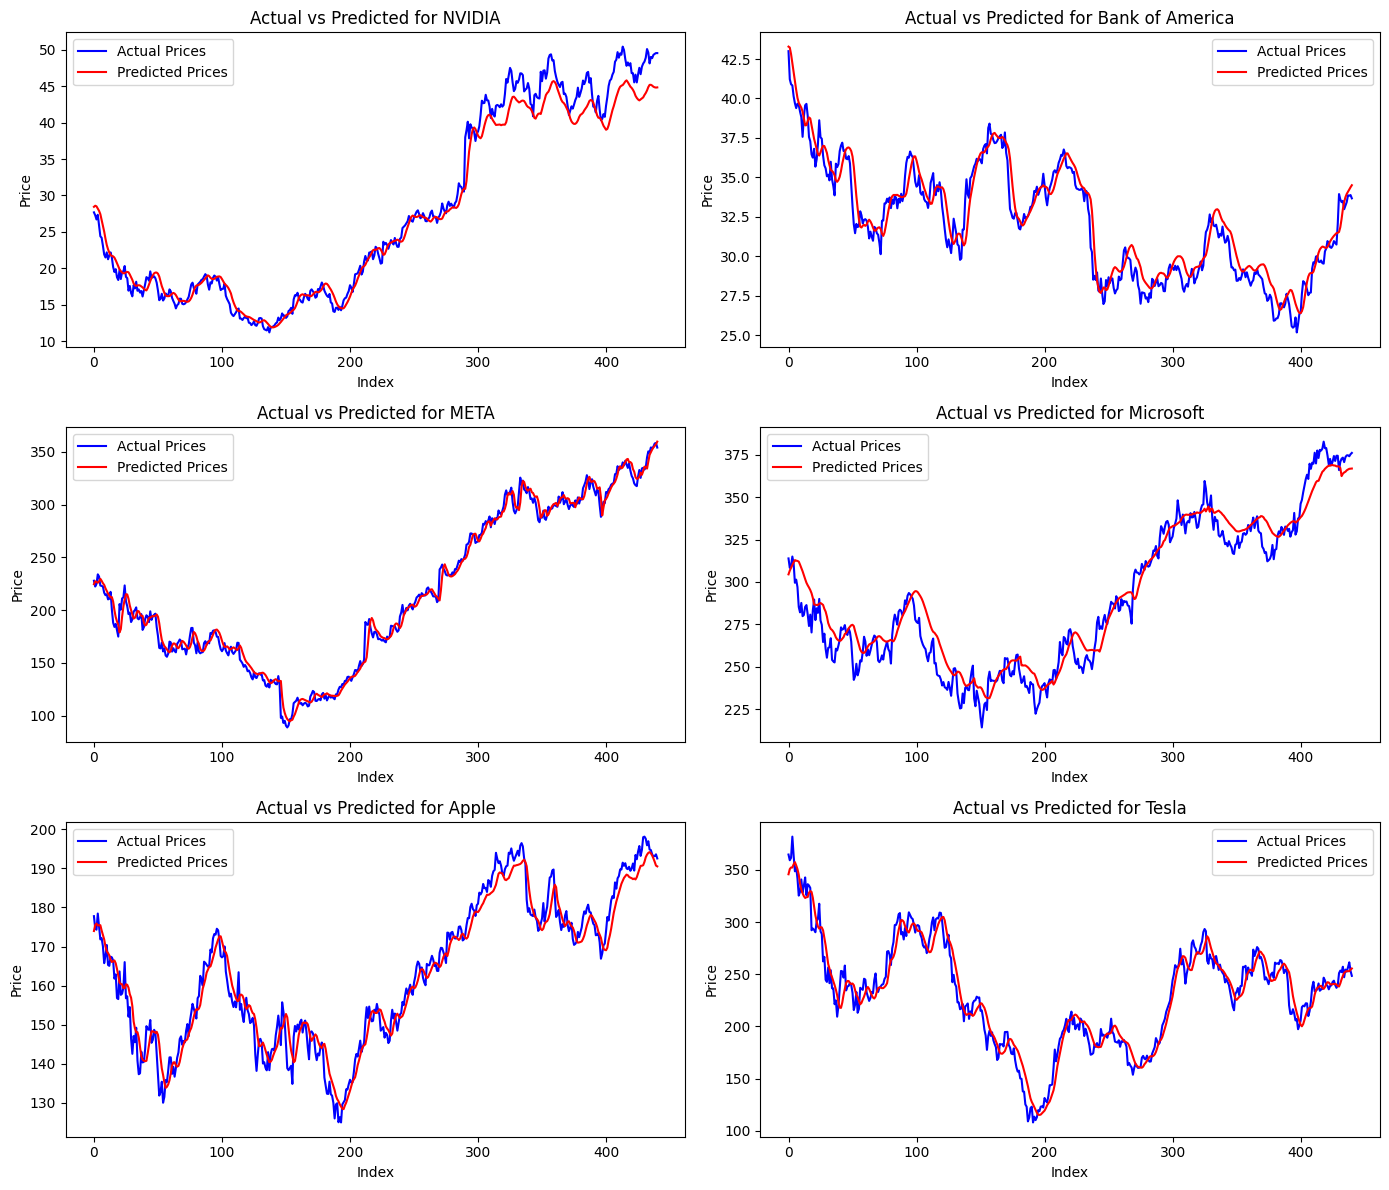

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Company names and their tickers
company_list = ['NVIDIA', 'Bank of America', 'META', 'Microsoft', 'Apple', 'Tesla']
ticker_list = ['NVDA', 'BAC', 'META', 'MSFT', 'AAPL', 'TSLA']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

results_df_lstm = []

# Loop through each stock
for i, ticker in enumerate(ticker_list):
    # Load data
    data = yf.download(ticker, start="2015-01-01", end="2024-01-01")

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Volume', 'Adj Close']].values
    target = data['Close'].values

    # Standard scaling
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    target_scaled = scaler.fit_transform(target.reshape(-1, 1))

    # Create sequences
    sequence_length = 60
    X, y = [], []
    for j in range(sequence_length, len(features_scaled)):
        X.append(features_scaled[j-sequence_length:j])
        y.append(target_scaled[j])

    X, y = np.array(X), np.array(y)

    # Train-test split
    train_size = int(X.shape[0] * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Define LSTM model
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
              callbacks=[early_stopping], verbose=0)

    # Predict
    predictions = model.predict(X_test)
    predictions_original = scaler.inverse_transform(predictions)
    y_test_original = scaler.inverse_transform(y_test)

    # Calculate metrics
    mse = mean_squared_error(y_test_original, predictions_original)
    mae = mean_absolute_error(y_test_original, predictions_original)
    rmse = np.sqrt(mse)

    results = {
        'Model': ticker,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    }
    results_df_lstm.append(results)

    # Plot for each stock
    axes[i].plot(y_test_original, label='Actual Prices', color='blue')
    axes[i].plot(predictions_original, label='Predicted Prices', color='red')
    axes[i].set_title(f'Actual vs Predicted for {company_list[i]}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Price')
    axes[i].legend()

# Create results DataFrame
results_df_lstm = pd.DataFrame(results_df_lstm)
results_df_lstm.set_index('Model', inplace=True)
print(results_df_lstm)

# Adjust layout and show plot
plt.tight_layout()
plt.show()